In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import scipy, sklearn, urllib, librosa, IPython.display as ipd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [2]:
# load features.csv
df = pd.read_csv('features.csv')

In [3]:
# csv file without filename

features = df.drop(columns=["filename"])


In [4]:
#check number of rows and columns in dataset
features.shape

(1000, 41)

In [5]:
#create a dataframe with all training data except the target column
X = features.drop(columns=["genre"])

In [6]:
#separate target values
y = df["genre"].values


# XGB

In [7]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# make predictions for test data
y_pred = xgb.predict(X_test)

print('Accuracy: {0:.3f} %'.format(xgb.score(X_test, y_test) * 100))


Accuracy: 72.500 %


In [8]:
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

       blues       0.80      0.80      0.80        20
   classical       1.00      0.85      0.92        20
     country       0.64      0.70      0.67        20
       disco       0.71      0.75      0.73        20
      hiphop       0.67      0.70      0.68        20
        jazz       0.67      0.80      0.73        20
       metal       0.80      0.80      0.80        20
         pop       0.80      0.80      0.80        20
      reggae       0.57      0.60      0.59        20
        rock       0.64      0.45      0.53        20

   micro avg       0.72      0.72      0.73       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200



Text(0.5, 8.5, 'Predicted Label')

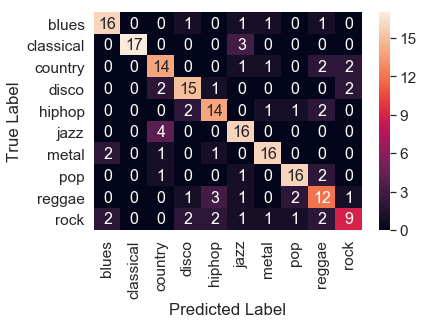

In [9]:
# Confusion Matrix
import seaborn as sn
genres = df["genre"].unique()
cmx = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cmx,genres,genres)
sn.set(font_scale = 1.4)
sn.heatmap(df_cm, annot = True, annot_kws = {"size": 16})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')